# jet_model  user guide : physical setup


## basic  setup

In [55]:
%matplotlib inline
from jetset.jet_model import Jet
my_jet=Jet(name='test',electron_distribution='lppl',)

In [56]:
Jet.available_electron_distributions()

lp: log-parabola
pl: powerlaw
lppl: log-parabola with low-energy powerlaw branch
lpep: log-parabola defined by peak energy
plc: powerlaw with cut-off
bkn: broken powerlaw
spitkov: 
lppl_pile_up: 
bkn_pile_up: 


In [57]:
my_jet.show_pars()

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 B                | magnetic_field       | G                | +1.000000e-01 | [+0.000000e+00,No           ] | False 
 N                | electron_density     | cm^-3            | +1.000000e+02 | [+0.000000e+00,No           ] | False 
 R                | region_size          | cm               | +1.569897e+01 | [+0.000000e+00,+3.000000e+01] | True 
 beam_obj         | beaming              |                  | +1.000000e+01 | [+1.000000e+00,No           ] | False 
 gamma0_log_parab | turn-over-energy     | Lorentz-factor   | +1.000000e+04 | [+1.000000e+00,+1.000000e+08] | False 
 gmax             | high-energy-cut-off  | Lorentz-f

In [58]:
my_jet.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: test  

electron distribution:
 type: lppl  
 electron energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-----------

as you can notice, you can now access further information regarding the model, such as numerical configuration of the grid. These parameters will be discussed 
in the :ref:`jet_numerical_guide' section

## setting the parameters

In [59]:
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=14.5)
my_jet.set_par('N',val=1E3)

In [60]:
my_jet.parameters.B.val=0.2
my_jet.parameters.r.val=0.4

## evaluate and plot  the model


At this point we can evaluate the  emission for this jet model using the instruction

In [61]:
my_jet.eval()

In [62]:
my_jet.show_pars()

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 B                | magnetic_field       | G                | +2.000000e-01 | [+0.000000e+00,No           ] | False 
 N                | electron_density     | cm^-3            | +1.000000e+03 | [+0.000000e+00,No           ] | False 
 R                | region_size          | cm               | +1.450000e+01 | [+0.000000e+00,+3.000000e+01] | True 
 beam_obj         | beaming              |                  | +1.000000e+01 | [+1.000000e+00,No           ] | False 
 gamma0_log_parab | turn-over-energy     | Lorentz-factor   | +5.000000e+03 | [+1.000000e+00,+1.000000e+08] | False 
 gmax             | high-energy-cut-off  | Lorentz-f

and plot the corresponding SED:


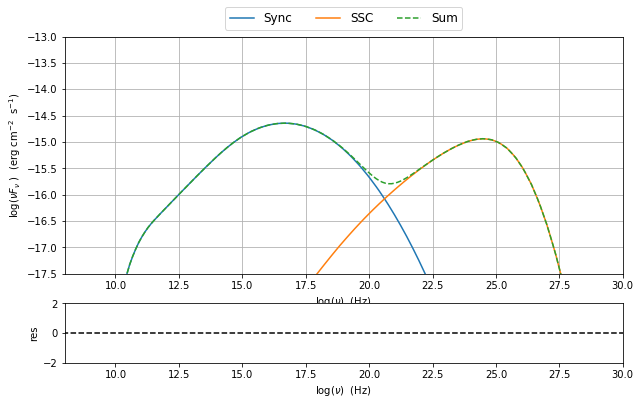

In [63]:
from jetset.plot_sedfit import PlotSED
my_plot=PlotSED()
my_jet.plot_model(plot_obj=my_plot)
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

alternatively, you can call the ``plot_model`` method without passing a ``Plot`` object

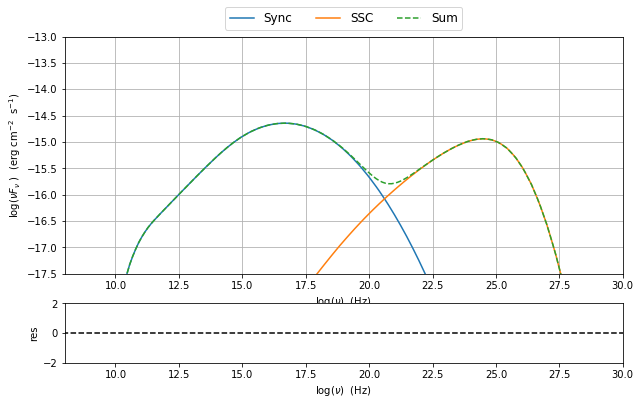

In [64]:
my_plot=my_jet.plot_model()
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

the ``my_plot`` objet returned will be built on the fly by the  ``plot_model`` method

## comparing models on the same plot

to compare the same model after changing a parameter

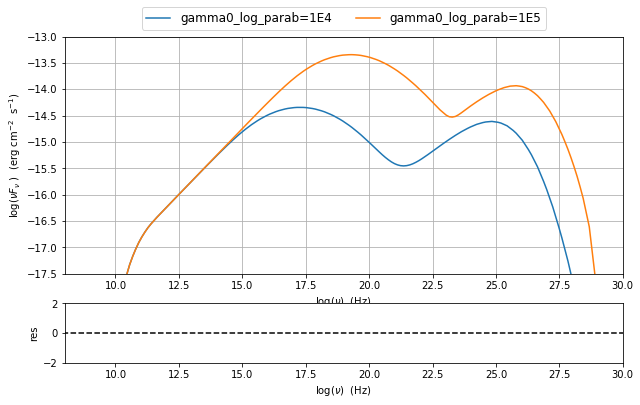

In [65]:
my_jet.parameters.gamma0_log_parab.val=1E4
my_jet.eval()
my_plot=my_jet.plot_model(label='gamma0_log_parab=1E4',comp='Sum')
my_jet.set_par('gamma0_log_parab',val=1.0E5)
my_jet.eval()
my_plot=my_jet.plot_model(my_plot,label='gamma0_log_parab=1E5',comp='Sum')
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

## saving a plot

to save the plot

In [66]:
my_plot.save('jet1.png')

## saving and lodaing  a model

In [67]:
my_jet.save_model('test_model.dat')

In [68]:
my_jet_new=Jet.load_model('test_model.dat')

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 B                | magnetic_field       | G                | +1.000000e-01 | [+0.000000e+00,No           ] | False 
 N                | electron_density     | cm^-3            | +1.000000e+02 | [+0.000000e+00,No           ] | False 
 R                | region_size          | cm               | +1.569897e+01 | [+0.000000e+00,+3.000000e+01] | True 
 beam_obj         | beaming              |                  | +1.000000e+01 | [+1.000000e+00,No           ] | False 
 gamma0_log_parab | turn-over-energy     | Lorentz-factor   | +1.000000e+04 | [+1.000000e+00,+1.000000e+08] | False 
 gmax             | high-energy-cut-off  | Lorentz-f

## switching on/off the particle distribution normalization

In [69]:
my_jet.Norm_distr

1

In [70]:
my_jet.switch_Norm_distr_OFF()

In [71]:
my_jet.switch_Norm_distr_ON()

## setting the particle density  from observed Fluxes or Luminosityes

In [72]:
my_jet=Jet(name='test',electron_distribution='lppl')

this is the initial value of N

In [73]:
my_jet.parameters.N.val

100.0

In [74]:

my_jet.set_N_from_nuFnu(nuFnu_obs=1E-14,nu_obs=1E15)

This is the updated value of ``N``, obtained in order to match the given flux at the given frequency

In [75]:
my_jet.get_par_by_name('N').val

249.04461454958587

In [76]:
my_jet.parameters.show_pars()

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 N                | electron_density     | cm^-3            | +2.490446e+02 | [+0.000000e+00,No           ] | False 
 gmin             | low-energy-cut-off   | Lorentz-factor   | +2.000000e+00 | [+1.000000e+00,+1.000000e+05] | False 
 gmax             | high-energy-cut-off  | Lorentz-factor   | +1.000000e+06 | [+1.000000e+00,+1.000000e+15] | False 
 s                | LE_spectral_slope    |                  | +2.000000e+00 | [-1.000000e+01,+1.000000e+01] | False 
 r                | spectral_curvature   |                  | +4.000000e-01 | [-1.500000e+01,+1.500000e+01] | False 
 gamma0_log_parab | turn-over-energy     | Lorentz-

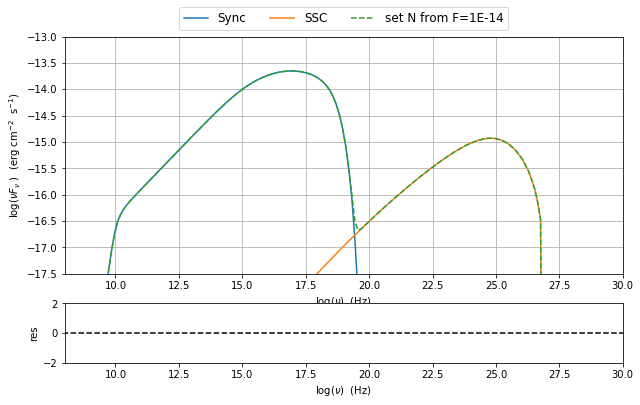

In [77]:
my_jet.eval()
my_plot=my_jet.plot_model(label='set N from F=1E-14')
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

In [78]:
my_jet.set_N_from_nuLnu(L_0=1E43,nu_0=1E15)

## setting the beaming factor

It is possible to set the bemaing factor according to the realativistic BulkFactor and viewing angle, this can be done by setting the ``beaming_expr`` kw in the Jet constructor, possbile choiches are

* `delta` to provide directly the beaming factor (default)
* `bulk_theta` to provide the BulkFactor and the jet  viewing angle 

In [79]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='bulk_theta')

In [80]:
my_jet.parameters.show_pars()

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 N                | electron_density     | cm^-3            | +1.000000e+02 | [+0.000000e+00,No           ] | False 
 gmin             | low-energy-cut-off   | Lorentz-factor   | +2.000000e+00 | [+1.000000e+00,+1.000000e+05] | False 
 gmax             | high-energy-cut-off  | Lorentz-factor   | +1.000000e+06 | [+1.000000e+00,+1.000000e+15] | False 
 s                | LE_spectral_slope    |                  | +2.000000e+00 | [-1.000000e+01,+1.000000e+01] | False 
 r                | spectral_curvature   |                  | +4.000000e-01 | [-1.500000e+01,+1.500000e+01] | False 
 gamma0_log_parab | turn-over-energy     | Lorentz-

In [81]:
my_jet.get_beaming()

19.943844732554165

In [82]:
my_jet.set_par('theta',val=10.)

In [83]:
my_jet.get_beaming()

4.968041140891955

In [87]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='delta')

In [88]:
my_jet.parameters.show_pars()

-------------------------------------------------------------------------------------------------------------------
model parameters:
 Name             | Type                 | Units            | value         | phys. boundaries              | log
-------------------------------------------------------------------------------------------------------------------
 N                | electron_density     | cm^-3            | +1.000000e+02 | [+0.000000e+00,No           ] | False 
 gmin             | low-energy-cut-off   | Lorentz-factor   | +2.000000e+00 | [+1.000000e+00,+1.000000e+05] | False 
 gmax             | high-energy-cut-off  | Lorentz-factor   | +1.000000e+06 | [+1.000000e+00,+1.000000e+15] | False 
 s                | LE_spectral_slope    |                  | +2.000000e+00 | [-1.000000e+01,+1.000000e+01] | False 
 r                | spectral_curvature   |                  | +4.000000e-01 | [-1.500000e+01,+1.500000e+01] | False 
 gamma0_log_parab | turn-over-energy     | Lorentz-

## accessing individual spectral components

It is possible to access specific spectral components of oura model

In [89]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='bulk_theta')
my_jet.eval()

In [90]:

my_jet.list_spectral_components()

Sum
Sync
SSC


the on-screen message is telling us which components have been evaluated. 

In [91]:
Sync=my_jet.get_spectral_component_by_name('Sync')

OR

In [92]:
Sync=my_jet.spectral_components.Sync

and from the ``SED`` object we can extract both the nu and nuFnu array

In [93]:
nu_sync=Sync.SED.nu
nuFnu_sync=Sync.SED.nuFnu

In [94]:
print (nuFnu_sync)

[1.00000000e-120 1.00000000e-120 1.00000000e-120 1.00000000e-120
 1.00000000e-120 1.00000000e-120 1.00000000e-120 1.00000000e-120
 1.00000000e-120 1.00000000e-120 1.00000000e-120 3.09064764e-026
 7.32454038e-026 1.75270679e-025 4.24520963e-025 1.04379743e-024
 2.61693555e-024 6.67461898e-024 1.72668460e-023 4.50933880e-023
 1.18346083e-022 3.11153382e-022 8.18386409e-022 2.15257260e-021
 5.66184114e-021 1.48921531e-020 3.91703222e-020 1.03028181e-019
 2.70988579e-019 7.12730622e-019 1.87412089e-018 4.92274314e-018
 1.28806868e-017 3.27741235e-017 7.39199471e-017 1.34878914e-016
 2.02382945e-016 2.65770333e-016 3.24635424e-016 3.83058445e-016
 4.45026043e-016 5.13453305e-016 5.90727157e-016 6.78881277e-016
 7.79778401e-016 8.95461935e-016 1.02817311e-015 1.18045307e-015
 1.35526785e-015 1.55592980e-015 1.78624983e-015 2.05059908e-015
 2.35398201e-015 2.70212561e-015 3.10158088e-015 3.55983479e-015
 4.08543468e-015 4.68812553e-015 5.37897006e-015 6.17039952e-015
 7.07667943e-015 8.113794